<a href="https://colab.research.google.com/github/rlevy820/ds2002/blob/main/API_Homework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [93]:
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt

In [75]:
apikey=""


headers = {
    'x-api-key': apikey
}

In [79]:
stocks_input = input("Enter a comma-separated list of stock symbols: ")
stock_list = [stock.strip() for stock in stocks_input.split(',')]
print("Your list of stocks:", stock_list)

stock_string = ""
for i, stock in enumerate(stock_list):
  stock_string += stock
  if i < len(stock_list) - 1:
    stock_string += ","

Enter a comma-separated list of stock symbols: msft,tsla,nvda
Your list of stocks: ['msft', 'tsla', 'nvda']


In [80]:

url = 'https://yfapi.net/v6/finance/quote?region=US&lang=en&symbols='

querystring = {"symbols":stock_string}
response = requests.request("GET", url, headers=headers, params=querystring)
stock_json = response.json()

output = []

for i in range(len(stock_list)):
  try:
    result = stock_json['quoteResponse']['result'][i]

    ticker = result["symbol"]
    name = result["longName"]
    current_price = result["regularMarketPrice"]
    fifty_two_week_high = result["fiftyTwoWeekHigh"]
    fifty_two_week_low = result["fiftyTwoWeekLow"]
    output.append({'Ticker': ticker, 'Name': name, 'Current Price': current_price, '52 Week High': fifty_two_week_high, '52 Week Low': fifty_two_week_low})
  except:
    print(f"Error processing stock")


output_df_1 = pd.DataFrame(output)
output_df_1

,Ticker,Name,Current Price,52 Week High,52 Week Low
0,MSFT,Microsoft Corporation,428.02,468.35,311.21
1,TSLA,"Tesla, Inc.",260.46,271.00,138.80
2,NVDA,NVIDIA Corporation,121.40,140.76,39.23


In [81]:
url = 'https://yfapi.net/ws/insights/v1/finance/insights?symbol='

output=[]

for i in range(len(stock_list)):
  try:
    querystring = {"symbol":stock_list[i]}
    response = requests.request("GET", url, headers=headers, params=querystring)
    stock_json = response.json()
    response = stock_json['finance']['result']
    ticker = response['symbol'].upper()
    target_mean_price = response['instrumentInfo']['recommendation']['targetPrice']
    output.append({'Ticker': ticker, 'Target Mean Price': target_mean_price})
  except:
    print(f"Error processing stock")

output_df_2 = pd.DataFrame(output)
output_df_2

,Ticker,Target Mean Price
0,MSFT,526.0
1,TSLA,286.0
2,NVDA,150.0


In [82]:
merged_df = pd.merge(output_df_1, output_df_2, on='Ticker', how='left')
merged_df

,Ticker,Name,Current Price,52 Week High,52 Week Low,Target Mean Price
0,MSFT,Microsoft Corporation,428.02,468.35,311.21,526.0
1,TSLA,"Tesla, Inc.",260.46,271.00,138.80,286.0
2,NVDA,NVIDIA Corporation,121.40,140.76,39.23,150.0


In [84]:
url='https://yfapi.net/v1/finance/trending/US'
response = requests.request("GET", url, headers=headers)
stock_json = response.json()

print('5 of the current trending stocks')
for i in range(5):
  trending_stocks = stock_json['finance']['result'][0]['quotes'][:5][i]['symbol']
  print(trending_stocks)

5 of the current trending stocks
AMSC
RACE
XRP-USD
BBD
PWR


Enter one stock symbol: msft


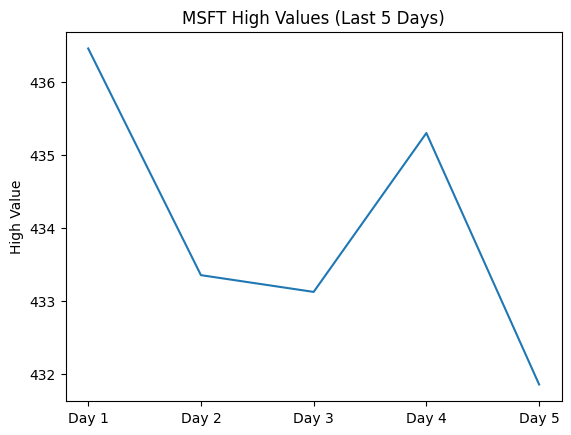

In [102]:
# highest value of last 5 days

stock_input = input("Enter one stock symbol: ")

url = 'https://yfapi.net/v8/finance/chart/' + stock_input + '?range=5d&region=US&interval=1d&lang=e'
response = requests.request("GET", url, headers=headers)
stock_json = response.json()
high_values = stock_json['chart']['result'][0]['indicators']['quote'][0]['high']

plt.plot(high_values)
plt.ylabel('High Value')
plt.xticks(range(len(high_values)), ['Day 1', 'Day 2', 'Day 3', 'Day 4', 'Day 5'])
plt.title(stock_input.upper() + ' High Values (Last 5 Days)')
plt.show()